<a href="https://colab.research.google.com/github/Masyithah28/Masyithah28-PCVK_Ganjil_2024/blob/main/Kuis2_Klasifikasi_Boot_Sandal_Shoe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 2 - PCVK
## Judul: Klasifikasi Boot, Sandal, Shoe
### Nama  : Masyithah Sophia Damayanti  
### Kelas : TI - 3C   
### NIM   : 2241720011  
### No    : 15  

[Github](https://)  
[Google Colab](https://colab.research.google.com/drive/1JkGl2iRHYimlbYGmunWDNz48b4p7KCok?usp=sharing)

## Import Library

In [ ]:
# Import necessary libraries
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image # Removed the extra dot from the import statement

import tensorflow_hub as hub

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images")

print("Path to dataset files:", path)

100%|██████████| 47.0M/47.0M [00:00<00:00, 53.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images/versions/2


In [ ]:
# Set dataset path
data_directory = '/root/.cache/kagglehub/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images/versions/2/Shoe vs Sandal vs Boot Dataset'  # Update this to the correct path
# Convert data_directory to a Path object
data_directory = pathlib.Path(data_directory)
class_names = sorted([item.name for item in data_directory.glob('*')][:3]) # Now this line should work
print(class_names)

['Boot', 'Sandal', 'Shoe']


In [ ]:
boot_dir = '/root/.cache/kagglehub/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images/versions/2/Shoe vs Sandal vs Boot Dataset/Boot'
sandal_dir = '/root/.cache/kagglehub/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images/versions/2/Shoe vs Sandal vs Boot Dataset/Sandal'
shoe_dir = '/root/.cache/kagglehub/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images/versions/2/Shoe vs Sandal vs Boot Dataset/Shoe'



In [ ]:
boot_images = len(os.listdir(boot_dir))
sandal_images = len(os.listdir(sandal_dir))
shoe_images = len(os.listdir(shoe_dir))
print(f'Jumlah Gambar Boot dalam dataset: {boot_images}')
print(f'Jumlah Gambar Sandal dalam dataset: {sandal_images}')
print(f'Jumlah Gambar Shoe dalam dataset: {shoe_images}')

Jumlah Gambar Boot dalam dataset: 5000
Jumlah Gambar Sandal dalam dataset: 5000
Jumlah Gambar Shoe dalam dataset: 5000


## Pra Pengolahan Data Training & Data Testing

In [ ]:
# Defining data generator withou data augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split =0.2)
# Defining data generator withou data augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split =0.2)

train_data = data_gen.flow_from_directory(data_directory,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data_directory,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'validation',
                                          class_mode = 'binary')



Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
images, labels = next(train_data) # Use next(train_data) to get the next batch
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [ ]:
import matplotlib.pyplot as plt

def plot_random_images(): # Define the function correctly.
    """Plots random images from the dataset."""

    # Use next(train_data) instead of train_data.next()
    images, labels = next(train_data)
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize=(10, 10))

    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 21:  # Change '--' to '==' for comparison.
            break
    plt.tight_layout()
    plt.show()

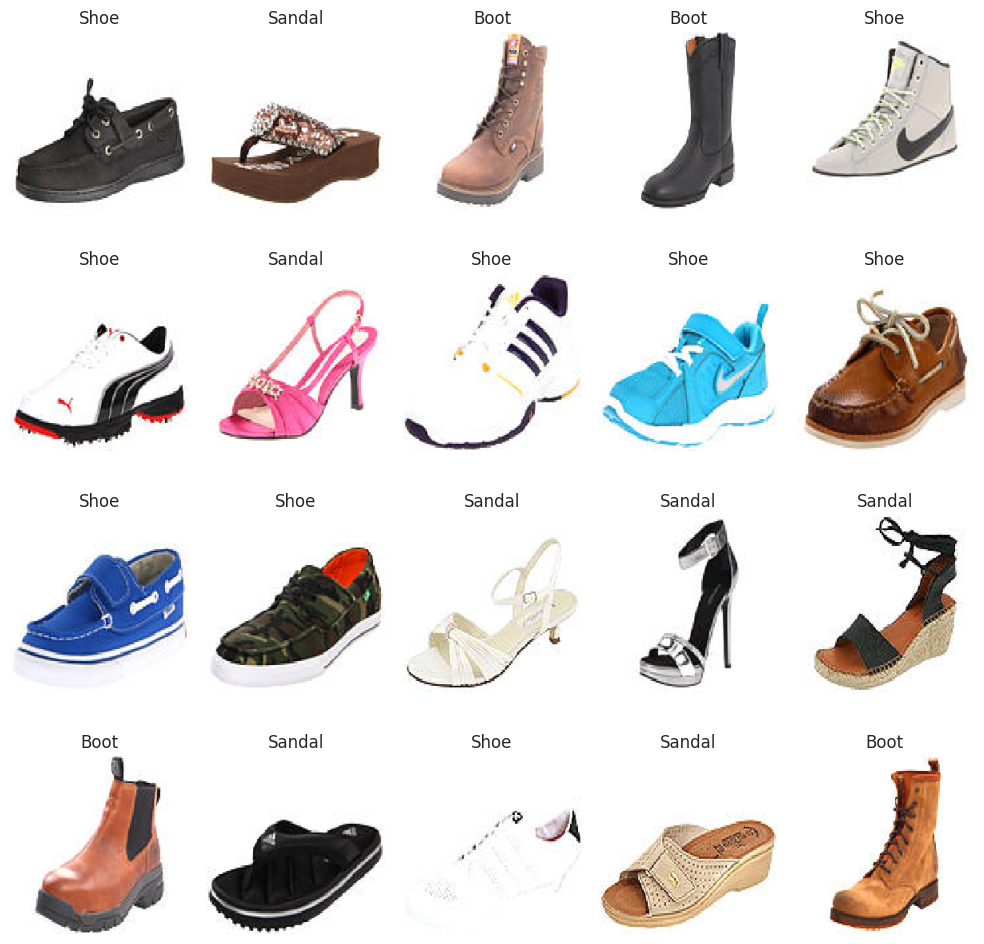

In [ ]:
plot_random_images()

In [ ]:
# Melatih Data
train_data, val_data

(<keras.src.legacy.preprocessing.image.DirectoryIterator at 0x7f0dc5af5390>,
 <keras.src.legacy.preprocessing.image.DirectoryIterator at 0x7f0dc5af5c30>)

## Pembuatan Model CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape = images[0].shape),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'), # Changed conv2D to Conv2D
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'), # Changed conv2D to Conv2D
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation ='softmax'),

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Fixed typo in 'optimizer'

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,710,019 (98.08 MB)

 Trainable params: 25,710,019 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [ ]:
classifier = model.fit(train_data, batch_size = 32,
                       epochs = 5,
                       validation_data = val_data,
                       verbose = 1,
                       callbacks = [reduce_lr])

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1345s 4s/step - accuracy: 0.7275 - loss: 1.4329 - val_accuracy: 0.9173 - val_loss: 0.2125 - learning_rate: 0.0010
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1352s 4s/step - accuracy: 0.9464 - loss: 0.1519 - val_accuracy: 0.9370 - val_loss: 0.1672 - learning_rate: 0.0010
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1355s 4s/step - accuracy: 0.9623 - loss: 0.1014 - val_accuracy: 0.9417 - val_loss: 0.1633 - learning_rate: 0.0010
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1348s 4s/step - accuracy: 0.9858 - loss: 0.0482 - val_accuracy: 0.9473 - val_loss: 0.1587 - learning_rate: 0.0010
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1329s 3s/step - accuracy: 0.9933 - loss: 0.0224 - val_accuracy: 0.9470 - val_loss: 0.1852 - learning_rate: 0.0010


In [ ]:
model.evaluate(val_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 911ms/step - accuracy: 0.9528 - loss: 0.1732


[0.18519453704357147, 0.9470000267028809]

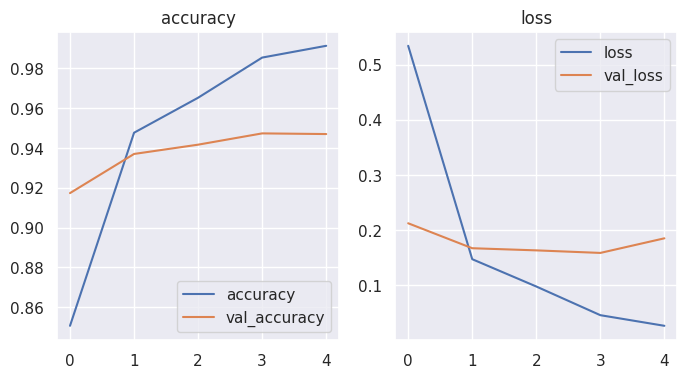

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('accuracy')
ax1.plot(classifier.history['accuracy'], label='accuracy') # Use classifier.history instead of model.history.history
ax1.plot(classifier.history['val_accuracy'], label='val_accuracy')
ax1.legend()

ax2.set_title('loss')
ax2.plot(classifier.history['loss'], label='loss')
ax2.plot(classifier.history['val_loss'], label='val_loss')
ax2.legend()

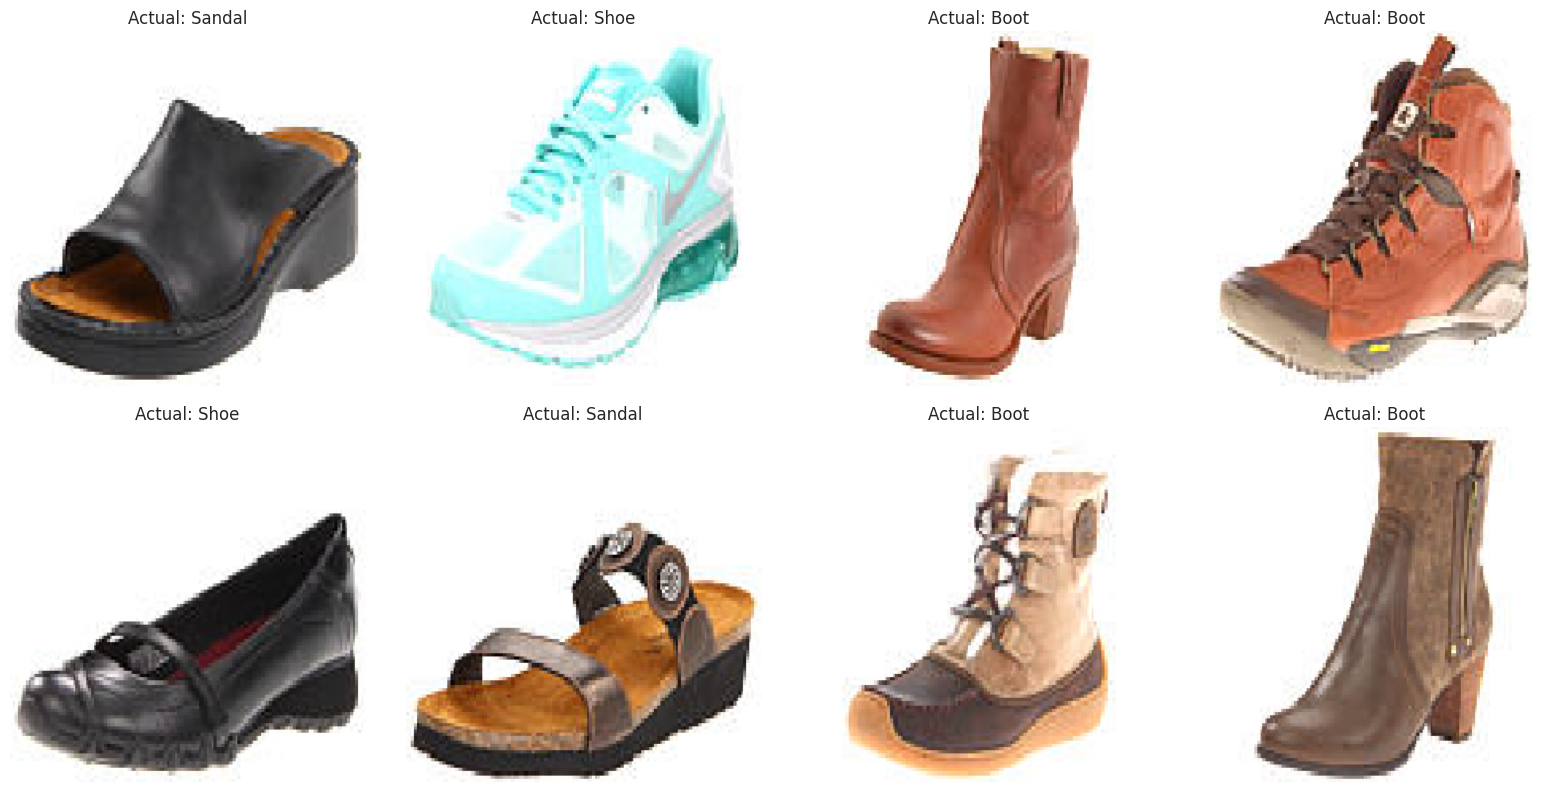

In [ ]:
# Visualize the predictions
plt.figure(figsize=(16, 16))
# Get one batch of images and labels
images, labels = next(train_data)

# Map numerical labels to class names
class_names = ['Boot', 'Sandal', 'Shoe']

# Convert labels to class names
labels_np = np.argmax(labels, axis=1) if len(labels.shape) > 1 else labels

# Display images with predictions
for i in range(min(8, len(images))):  # Maximum 8 images
    ax = plt.subplot(4, 4, i + 1)

    # Display original image
    plt.imshow(images[i])

    # Resize image for model input
    input_image = tf.image.resize(images[i], [224, 224])

    # Add batch dimension
    input_image = tf.expand_dims(input_image, axis=0)

    # Make predictions using the model
    predictions = model.predict(input_image, verbose=0)
    score = tf.nn.softmax(predictions[0])

    # Get actual and predicted labels
    actual_label = str(class_names[int(labels_np[i])])
    predicted_label = str(class_names[np.argmax(score)])

    # Determine color based on correctness
    predicted_axis_color = 'green' if actual_label == predicted_label else 'red'

    # Add title and label without accuracy
    plt.title(f"Actual: {actual_label}", fontsize=12)
    plt.ylabel(f"Predicted: {predicted_label}", fontsize=10, color=predicted_axis_color)

    # Hide axes labels
    plt.gca().axes.xaxis.set_ticklabels([])
    plt.gca().axes.yaxis.set_ticklabels([])
    plt.axis('off')  # Remove axis lines

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Kuis 2 CNN/klasifikasi boots sepatu sandal.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Kuis 2 CNN/klasifikasi boots sepatu sandal.keras')

In [92]:
from keras.preprocessing import image

def preprocess_image(path):
  # Use the 'image' module here for loading and preprocessing the image
  img = image.load_img(path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_preprocessed = img_array / 255.0
  return img_preprocessed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Class:  Shoe


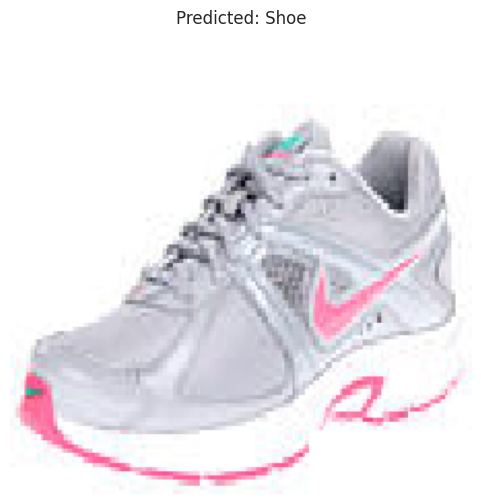

In [91]:
img_path = '/content/drive/MyDrive/tes 3.jpg'

# Preprocess the image
img = preprocess_image(img_path)

# Make predictions
predictions = loaded_model.predict(img)

# Define class labels (ensure this matches your model's output labels)
class_labels = ['Boot', 'Sandal', 'Shoe']

# Get the index of the highest predicted class
predicted_class_index = np.argmax(predictions)  # Find the index of the highest probability

# Get the corresponding label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print('Predicted Class: ', predicted_class_label)

# Display the image with matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img[0])  # img[0] because we have added a batch dimension
plt.title(f"Predicted: {predicted_class_label}")
plt.axis('off')  # Hide axis
plt.show()